In [ ]:
!pip install catboost
import requests
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
# General libraries
import numpy as np
import pandas as pd
import os
import joblib

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


#machine learning Algorithms For Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.7 MB/s eta 0:00:00


In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# data (as pandas dataframes)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# metadata
print(statlog_german_credit_data.metadata)

# variable information
print(statlog_german_credit_data.variables)


{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [ ]:

data = pd.concat([X, y], axis=1)
data.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
# Rename columns based on your provided mapping
new_column_names = {
    'Attribute1': 'Status of existing checking account',
    'Attribute2': 'Duration in month',
    'Attribute3': 'Credit history',
    'Attribute4': 'Purpose',
    'Attribute5': 'Credit amount',
    'Attribute6': 'Savings account/bonds',
    'Attribute7': 'Present employment since',
    'Attribute8': 'Installment rate in percentage of disposable income',
    'Attribute9': 'Personal status and sex',
    'Attribute10': 'Other debtors / guarantors',
    'Attribute11': 'Present residence since',
    'Attribute12': 'Property',
    'Attribute13': 'Age in years',
    'Attribute14': 'Other installment plans',
    'Attribute15': 'Housing',
    'Attribute16': 'Number of existing credits at this bank',
    'Attribute17': 'Job',
    'Attribute18': 'Number of people being liable to provide maintenance for',
    'Attribute19': 'Telephone',
    'Attribute20': 'Foreign worker',
    'class': 'Credit Risk'
}

data = data.rename(columns=new_column_names)
data.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Credit Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

In [ ]:
# prompt: show me all  object columns

object_cols = data.select_dtypes(include=['object']).columns
object_cols

Index(['Status of existing checking account', 'Credit history', 'Purpose',
       'Savings account/bonds', 'Present employment since',
       'Personal status and sex', 'Other debtors / guarantors', 'Property',
       'Other installment plans', 'Housing', 'Job', 'Telephone',
       'Foreign worker'],
      dtype='object')

In [ ]:
features_used = []
# Loop through object columns and apply appropriate conversion
for col in object_cols:
    if col == 'Purpose':  #handle target variable
        print(f"Handling feature with OneHotEncoder: {col}")
        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        encoded_features = ohe.fit_transform(data[[col]])
        joblib.dump(ohe, 'feature_onehot_encoder.pkl')
        encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out([col]))
        data = pd.concat([data, encoded_df], axis=1).drop(columns=col)
    else: #Handle features
        print(f"Handling feature with LabelEncoder: {col}")
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        features_used.append(col)
        joblib.dump(le, 'feature_label_encoder.pkl')

print(data.info())

Handling feature with LabelEncoder: Status of existing checking account
Handling feature with LabelEncoder: Credit history
Handling feature with OneHotEncoder: Purpose
Handling feature with LabelEncoder: Savings account/bonds
Handling feature with LabelEncoder: Present employment since
Handling feature with LabelEncoder: Personal status and sex
Handling feature with LabelEncoder: Other debtors / guarantors
Handling feature with LabelEncoder: Property
Handling feature with LabelEncoder: Other installment plans
Handling feature with LabelEncoder: Housing
Handling feature with LabelEncoder: Job
Handling feature with LabelEncoder: Telephone
Handling feature with LabelEncoder: Foreign worker
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Status of existing 

In [ ]:

data.describe()

,Status of existing checking account,Duration in month,Credit history,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,...,Purpose_A40,Purpose_A41,Purpose_A410,Purpose_A42,Purpose_A43,Purpose_A44,Purpose_A45,Purpose_A46,Purpose_A48,Purpose_A49
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.577000,20.903000,2.54500,3271.258000,1.105000,2.384000,2.973000,1.68200,0.145000,2.845000,...,0.234000,0.103000,0.01200,0.181000,0.280000,0.01200,0.022000,0.050000,0.009000,0.097000
std,1.257638,12.058814,1.08312,2822.736876,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,...,0.423584,0.304111,0.10894,0.385211,0.449224,0.10894,0.146757,0.218054,0.094488,0.296106
min,0.000000,4.000000,0.00000,250.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,2.00000,1365.500000,0.000000,2.000000,2.000000,1.00000,0.000000,2.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,18.000000,2.00000,2319.500000,0.000000,2.000000,3.000000,2.00000,0.000000,3.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,24.000000,4.00000,3972.250000,2.000000,4.000000,4.000000,2.00000,0.000000,4.000000,...,0.000000,0.000000,0.00000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.000000,72.000000,4.00000,18424.000000,4.000000,4.000000,4.000000,3.00000,2.000000,4.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [ ]:

# Histograms for numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Box plots for numerical features
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Countplots for categorical features
categorical_features = data.select_dtypes(include=['int64']).columns  # After encoding, categoricals are int64
for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=data[col])
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.show()

# Pairplot for selected numerical features (to avoid excessive plotting)
selected_numerical_features = ['Duration in month', 'Credit amount', 'Age in years']
sns.pairplot(data, vars=selected_numerical_features, hue='Credit Risk')
plt.show()


# Relationship between Credit Risk and other features
for col in data.columns:
    if col != 'Credit Risk':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='Credit Risk', y=col, data=data)
        plt.title(f'Credit Risk vs. {col}')
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:

X=data.drop('Credit Risk',axis=1)
y=data['Credit Risk']
# Assuming X and y are defined from previous code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Dictionary of classification algorithms
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Extra Trees": ExtraTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Gaussian Naive Baye": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1),  # Suppress LightGBM logs
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0),
    "Neural Network": MLPClassifier(random_state=42, max_iter=1000)

}


Training Logistic Regression...
Saved Logistic Regression model to trained_models/Logistic Regression.joblib
Logistic Regression Metrics:
Accuracy: 0.7900
Precision: 0.7806
Recall: 0.7900
F1 Score: 0.7792
----------------------------------------
Training Decision Tree...
Saved Decision Tree model to trained_models/Decision Tree.joblib
Decision Tree Metrics:
Accuracy: 0.7300
Precision: 0.7327
Recall: 0.7300
F1 Score: 0.7313
----------------------------------------
Training Extra Trees...
Saved Extra Trees model to trained_models/Extra Trees.joblib
Extra Trees Metrics:
Accuracy: 0.7050
Precision: 0.7258
Recall: 0.7050
F1 Score: 0.7125
----------------------------------------
Training Random Forest...
Saved Random Forest model to trained_models/Random Forest.joblib
Random Forest Metrics:
Accuracy: 0.8000
Precision: 0.7942
Recall: 0.8000
F1 Score: 0.7843
----------------------------------------
Training SVC...
Saved SVC model to trained_models/SVC.joblib
SVC Metrics:
Accuracy: 0.7150
Preci

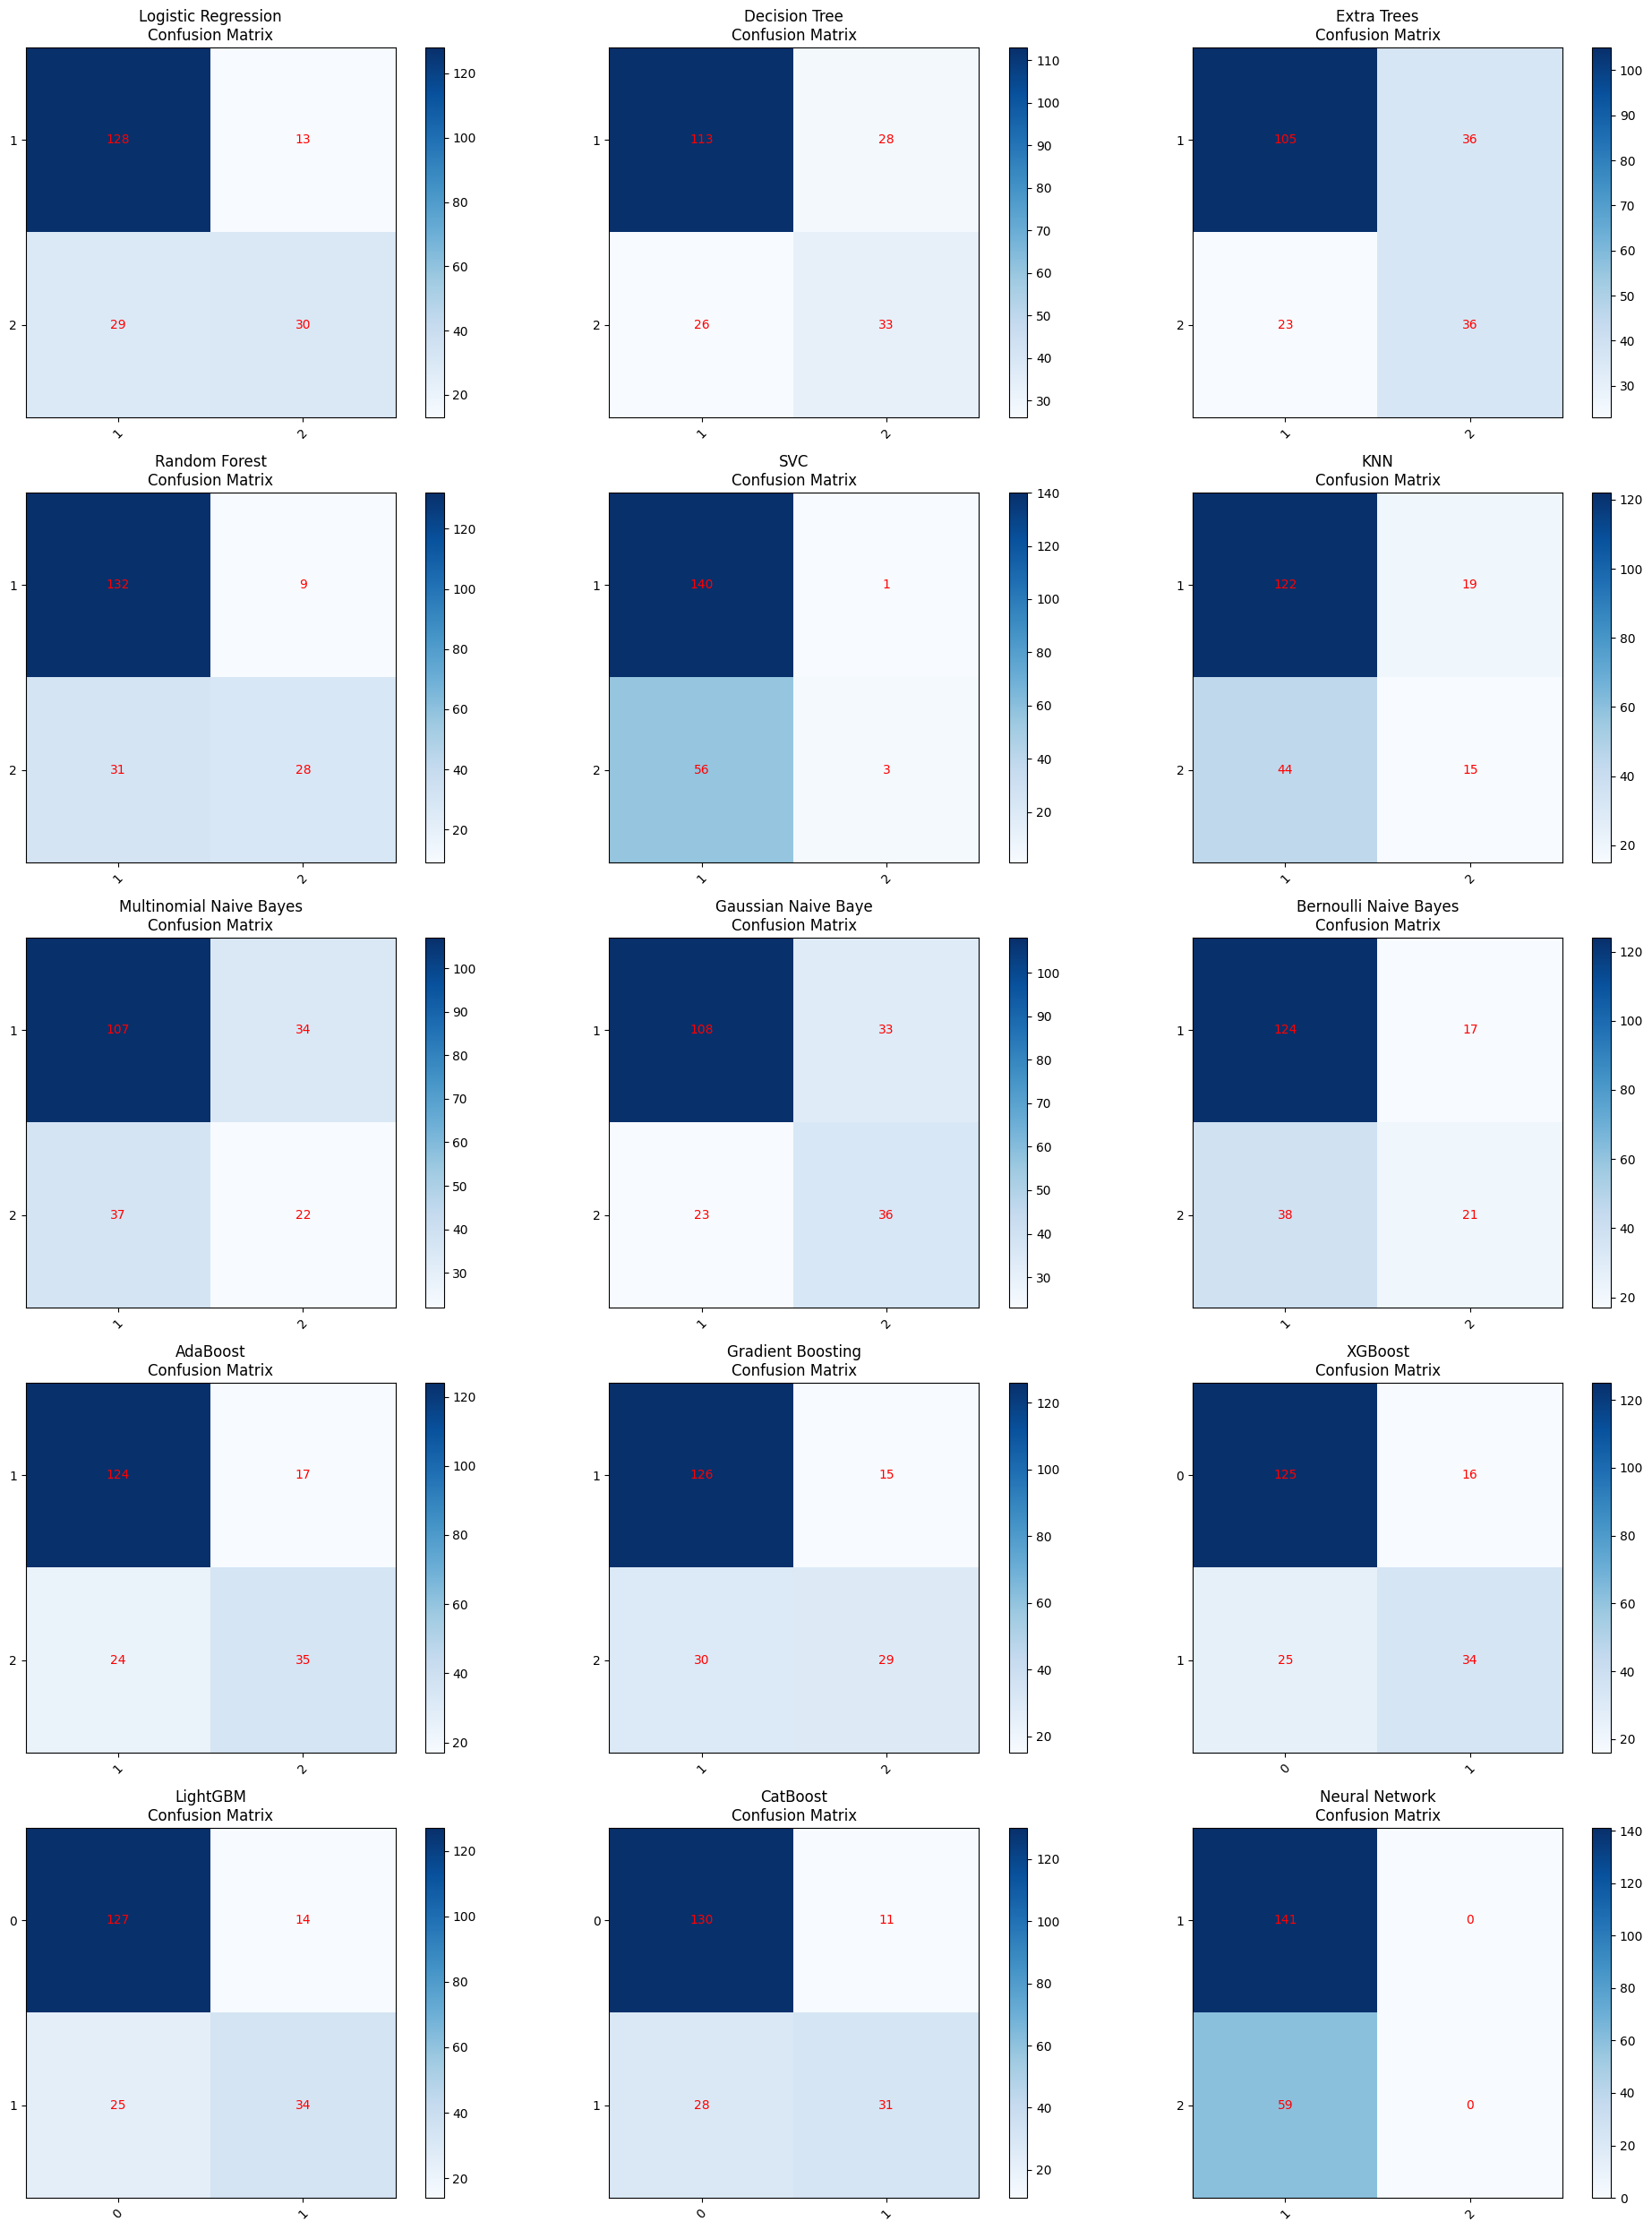

In [ ]:
models_dir = 'trained_models'
os.makedirs(models_dir, exist_ok=True)

# Initialize a figure for confusion matrices
num_classifiers = len(classifiers)
num_rows = int(np.ceil(num_classifiers / 3))  # Adjust columns as needed
num_cols = 3  # You can adjust this for a different layout

# Initialize a figure with enough subplots
plt.figure(figsize=(20, num_rows * 5))  # Adjust figure height dynamically

# Dictionary to store results for all models
results = {}

# Train and evaluate each classifier
for i, (name, model) in enumerate(classifiers.items()):
    print(f"Training {name}...")

    # Adjust labels for XGBoost, LightGBM, and CatBoost
    if name in ["XGBoost", "LightGBM", "CatBoost"]:
        y_train_adjusted = y_train - 1
        y_test_adjusted = y_test - 1
    else:
        y_train_adjusted = y_train
        y_test_adjusted = y_test

    # Fit the model
    model.fit(X_train, y_train_adjusted)

    # Save the trained model
    model_filename = os.path.join(models_dir, f"{name}.joblib")
    joblib.dump(model, model_filename)
    print(f"Saved {name} model to {model_filename}")

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test_adjusted, y_pred)
    precision = precision_score(y_test_adjusted, y_pred, average='weighted')
    recall = recall_score(y_test_adjusted, y_pred, average='weighted')
    f1 = f1_score(y_test_adjusted, y_pred, average='weighted')

    # Store metrics in the results dictionary
    results[name] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "confusion_matrix": confusion_matrix(y_test_adjusted, y_pred)
    }

    # Print metrics
    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 40)

    # Plot confusion matrix in a subplot
    cm = results[name]["confusion_matrix"]
    plt.subplot(num_rows, num_cols, i + 1)  # Use calculated rows and columns
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"{name}\nConfusion Matrix")
    plt.colorbar()

    # Get the number of unique classes in the target variable
    num_classes = len(np.unique(y_test_adjusted))

    tick_marks = np.arange(num_classes)  # Use num_classes instead of hardcoding 7
    plt.xticks(tick_marks, np.unique(y_test_adjusted), rotation=45)  # Use unique class labels
    plt.yticks(tick_marks, np.unique(y_test_adjusted))  # Use unique class labels

    # Labeling the matrix - adjust loop ranges
    for j in range(cm.shape[0]):  # Iterate over actual classes (rows)
        for k in range(cm.shape[1]):  # Iterate over predicted classes (columns)
            plt.text(k, j, format(cm[j, k], 'd'), ha="center", va="center", color="red")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

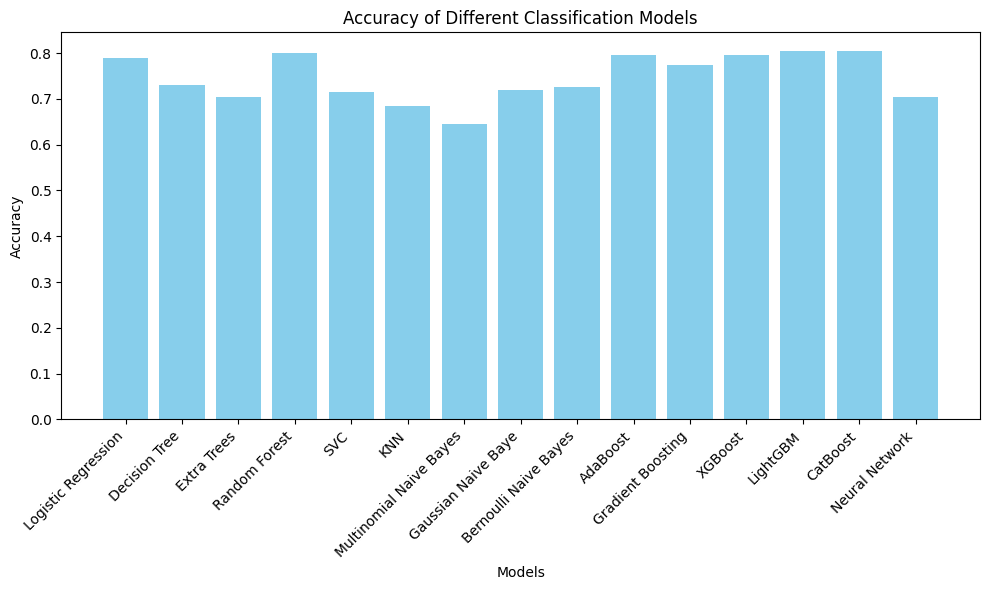

In [ ]:
model_names = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_names]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Classification Models")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

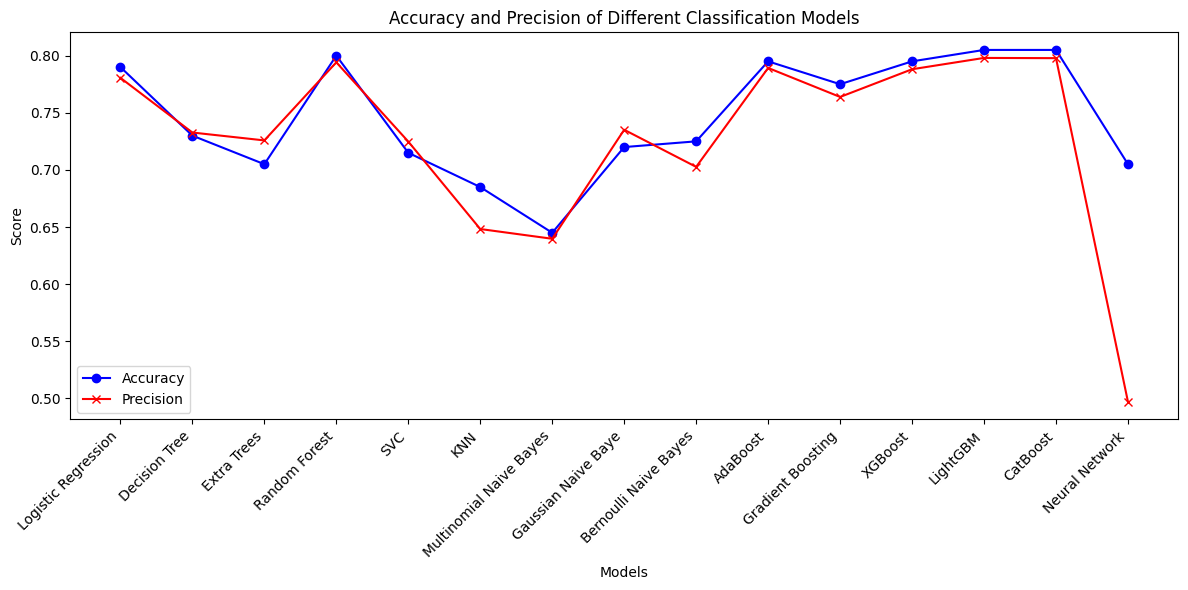

In [ ]:


# Assuming 'results' dictionary is already populated from the previous code
model_names = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_names]
precisions = [results[model]['precision'] for model in model_names]

plt.figure(figsize=(12, 6))

# Plot accuracies
plt.plot(model_names, accuracies, marker='o', label='Accuracy', color='blue')

# Plot precisions
plt.plot(model_names, precisions, marker='x', label='Precision', color='red')


plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Accuracy and Precision of Different Classification Models")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()